In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [4]:
train_dir = "../data/archive/train"
test_dir = "../data/archive/test"
emotion_labels = sorted(os.listdir(train_dir))
print("Emotion Classes:", emotion_labels)

Emotion Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


/var/folders/dk/72hxfyz526n5pcklvrdqxjx40000gn/T/ipykernel_7444/2996533478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Emotion", y="Count", data=eda_df, palette="Set2")


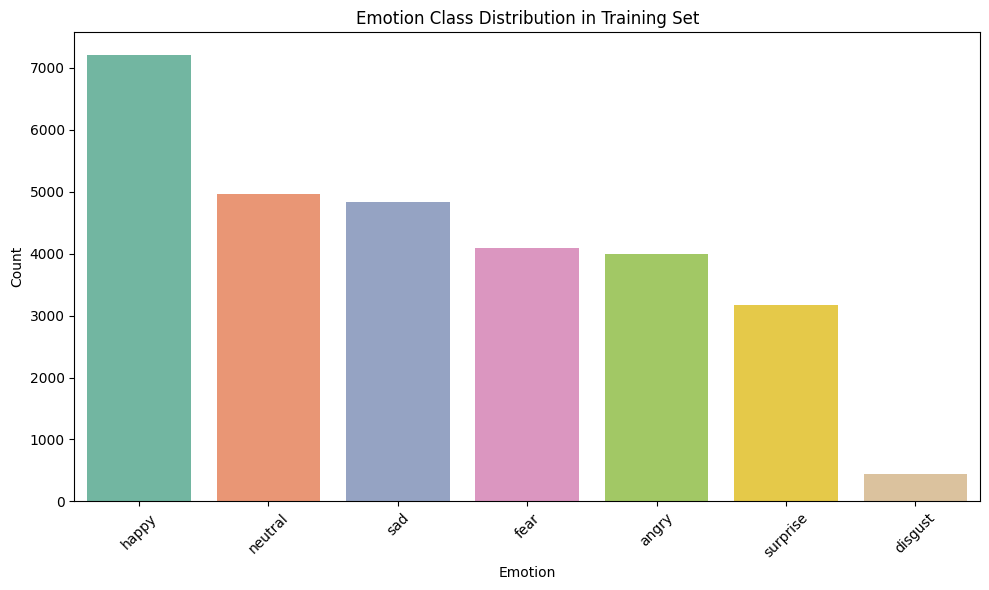

In [5]:
emotion_counts = {emotion: len(os.listdir(os.path.join(train_dir, emotion))) for emotion in emotion_labels}

# Convert to a DataFrame for plotting
import pandas as pd
eda_df = pd.DataFrame(list(emotion_counts.items()), columns=["Emotion", "Count"])
eda_df = eda_df.sort_values(by="Count", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Emotion", y="Count", data=eda_df, palette="Set2")
plt.title("Emotion Class Distribution in Training Set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

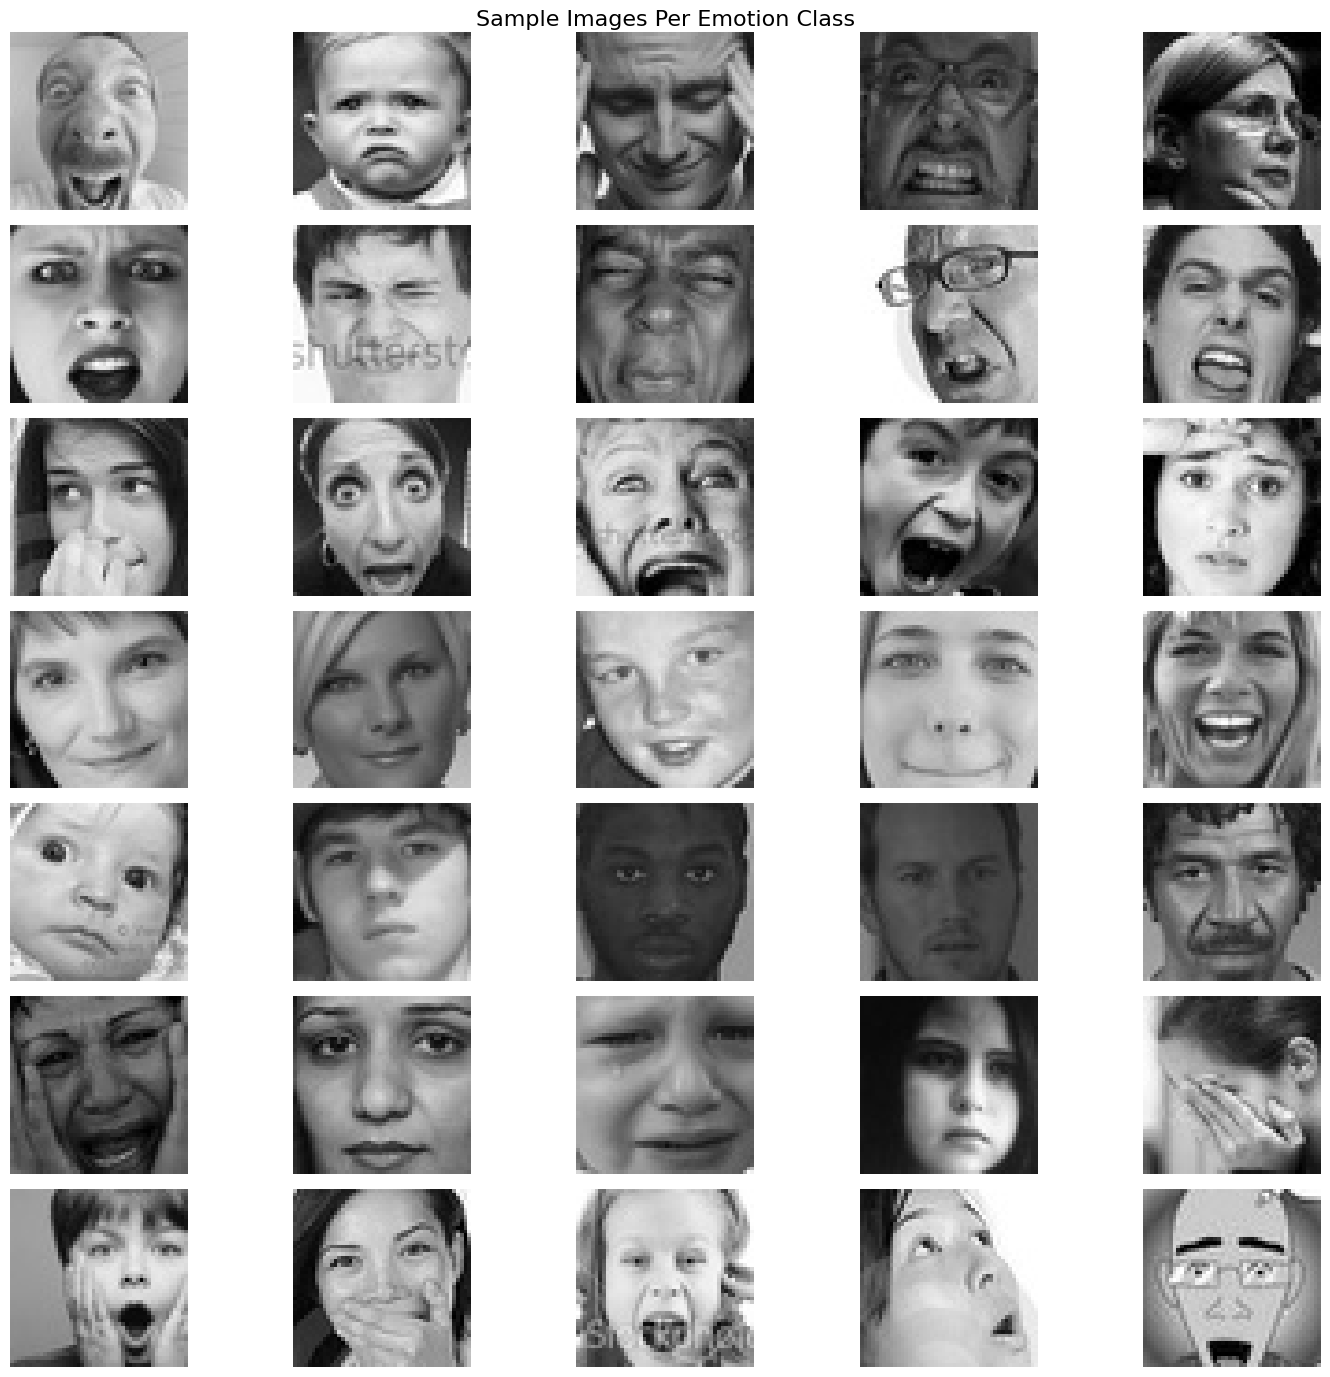

In [6]:
def show_samples(emotion_labels, train_dir, samples_per_class=5):
    plt.figure(figsize=(15, len(emotion_labels)*2))
    for idx, emotion in enumerate(emotion_labels):
        files = os.listdir(os.path.join(train_dir, emotion))[:samples_per_class]
        for i, file in enumerate(files):
            img_path = os.path.join(train_dir, emotion, file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(len(emotion_labels), samples_per_class, idx*samples_per_class + i + 1)
            plt.imshow(img)
            plt.axis('off')
            if i == 0:
                plt.ylabel(emotion, fontsize=12)
    plt.suptitle("Sample Images Per Emotion Class", fontsize=16)
    plt.tight_layout()
    plt.show()

show_samples(emotion_labels, train_dir)

In [7]:
img_path = os.path.join(train_dir, emotion_labels[0], os.listdir(os.path.join(train_dir, emotion_labels[0]))[0])
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
print("Sample image shape:", img.shape)  # Expected: (48, 48)

Sample image shape: (48, 48)
